In [112]:
%cd

!git clone https://github.com/matterport/Mask_RCNN.git


/root
fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.


In [0]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

import cv2
import time

import warnings
warnings.filterwarnings("ignore")

In [114]:
!pip install Pillow

In [0]:
import PIL

In [116]:



# # Import Mask RCNN
# sys.path.append('/content')  # To find local version of the library
%cd ~/Mask_RCNN
ROOT_DIR = os.path.abspath("../")

from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize

# Import COCO config
sys.path.append(os.path.join("/root/Mask_RCNN/samples/coco/"))  # To find local version
import coco

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join('', "mask_rcnn_coco.h5")

# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()


config.display()

# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir='mask_rcnn_coco.hy', config=config)

# Load weights trained on MS-COCO
model.load_weights('mask_rcnn_coco.h5', by_name=True)

# COCO Class names
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']
# COCO Class names
# class_names = ['person', 'bicycle', 'car', 'motorcycle', 'airplane',
#                'bus', 'train', 'truck', 'boat', 'traffic light',
#                'fire hydrant', 'stop sign', 'parking meter','bird',
#                'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear']

/root/Mask_RCNN

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MAS

In [117]:
%cd

!git clone 'https://github.com/naokishibuya/car-finding-lane-lines'

/root
fatal: destination path 'car-finding-lane-lines' already exists and is not an empty directory.


In [118]:


# Define Path for all the video and Image files

ROOT_DIR = os.getcwd()

VIDEO_IMAGE_DIR = '/root/Mask_RCNN/processedIMG'
VIDEO_SAVE_DIR = '/root/Mask_RCNN'
VIDEO_FILE_DIR = '/root/car-finding-lane-lines/test_videos'
os.mkdir(VIDEO_IMAGE_DIR)

# Function to display the object detection masks

FileExistsError: ignored

In [0]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()


In [0]:
def display_results(image, boxes, masks, class_ids, class_names, scores=None,
                        show_mask=True, show_bbox=True, display_img=True,
                        save_img=True, show_warning = True, save_dir=None, img_name=None):
        """
        boxes: [num_instance, (y1, x1, y2, x2, class_id)] in image coordinates.
        masks: [height, width, num_instances]
        class_ids: [num_instances]
        class_names: list of class names of the dataset (Without Background)
        scores: (optional) confidence scores for each box
        show_mask, show_bbox: To show masks and bounding boxes or not
        display_img: To display the image in popup
        save_img: To save the predict image
        save_dir: If save_img is True, the directory where you want to save the predict image
        img_name: If save_img is True, the name of the predict image

        """
        n_instances = boxes.shape[0]
        colors = color_map()
        for k in range(n_instances):
            color = colors[class_ids[k]].astype(np.int)
            if show_bbox:
                box = boxes[k]
                cls = class_names[class_ids[k]]  # Skip the Background
                score = scores[k]
                cv2.rectangle(image, (box[1], box[0]), (box[3], box[2]), 1)
                font = cv2.FONT_HERSHEY_SIMPLEX
                cv2.putText(image, '{}'.format(cls), (box[1], box[0]),
                            font, 0.5, (0, 255, 255), 1, cv2.LINE_AA)

            if show_mask:
                mask = masks[:, :, k]
                color_mask = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.int)
                color_mask[mask] = color
                image = cv2.addWeighted(color_mask, 0.5, image.astype(np.int), 1, 0)
            if show_warning:
              if class_ids[k] == 3 or class_ids[k] == 6 or class_ids[k] == 8 or class_ids[k] ==1 :
                  if scores[k]> 0.5 :
                    mid_x = (boxes[k][3]+boxes[k][1])/2
                    mid_y = (boxes[k][2]+boxes[k][0])/2
                    # print(mid_x, mid_y)
                    apx_distance = round((1-(boxes[k][3]-boxes[k][1]))**2,1)
                    cv2.rectangle(image, (boxes[k][1], boxes[k][0]), (boxes[k][3], boxes[k][2]), 1)
                    if apx_distance >= 30000 and  apx_distance <=100000  :
                      if mid_x > 0.3*1280 and mid_x < 0.7*1280:
                        cv2.putText(image, 'WARNING!!!', (int(mid_x), int(mid_y)), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 3)
                        cv2.rectangle(image, (boxes[k][1], boxes[k][0]), (boxes[k][3], boxes[k][2]),(0,0,255), 1)
                    elif apx_distance > 100000 :
                      # print(int(mid_x-50), int(mid_y))
                      cv2.putText(image, 'WARNING!!!', (int(mid_x), int(mid_y)), 
                                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 3)
                      cv2.rectangle(image, (boxes[k][1], boxes[k][0]), (boxes[k][3], boxes[k][2]),(0,0,255), 1)

        if display_img:
            plt.imshow(image)
            plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
            plt.show()
        if save_img:
            cv2.imwrite(os.path.join(save_dir, img_name), image)


        return None

In [0]:
def color_map(N=256, normalized=False):
        def bitget(byteval, idx):
            return ((byteval & (1 << idx)) != 0)

        dtype = 'float32' if normalized else 'uint8'
        cmap = np.zeros((N, 3), dtype=dtype)
        for i in range(N):
            r = g = b = 0
            c = i
            for j in range(8):
                r = r | (bitget(c, 0) << 7 - j)
                g = g | (bitget(c, 1) << 7 - j)
                b = b | (bitget(c, 2) << 7 - j)
                c = c >> 3

            cmap[i] = np.array([r, g, b])

        cmap = cmap / 255 if normalized else cmap
        return cmap

### Prepare Lane Detection


In [0]:
import matplotlib.pyplot as plt
import cv2
import os, glob
import numpy as np
from moviepy.editor import VideoFileClip
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [0]:
def show_images(images, cmap=None):
    cols = 2
    rows = (len(images)+1)//cols
    
    plt.figure(figsize=(10, 11))
    for i, image in enumerate(images):
        plt.subplot(rows, cols, i+1)
        # use gray scale color map if there is only one channel
        cmap = 'gray' if len(image.shape)==2 else cmap
        plt.imshow(image, cmap=cmap)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()
# Get White and Yellow Lines




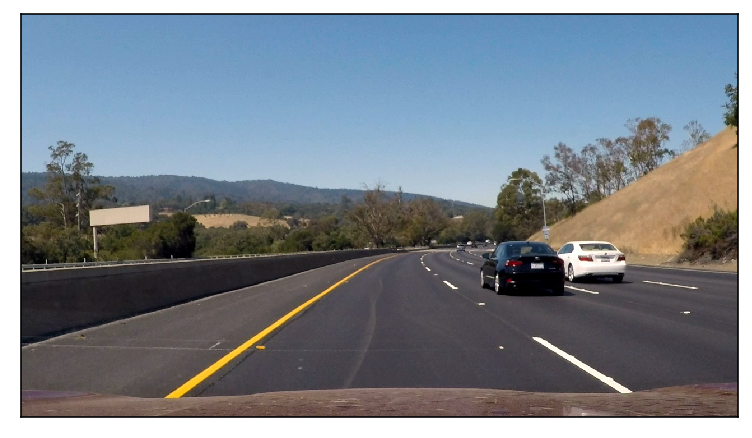

In [121]:
test_images = [plt.imread(path) for path in glob.glob('/root/car-finding-lane-lines/test_images/YellowWhite.jpg')]
# test_images = [plt.imread(path) for path in glob.glob('/root/Mask_RCNN/processedIMG/1.jpg')]
# 
show_images(test_images)


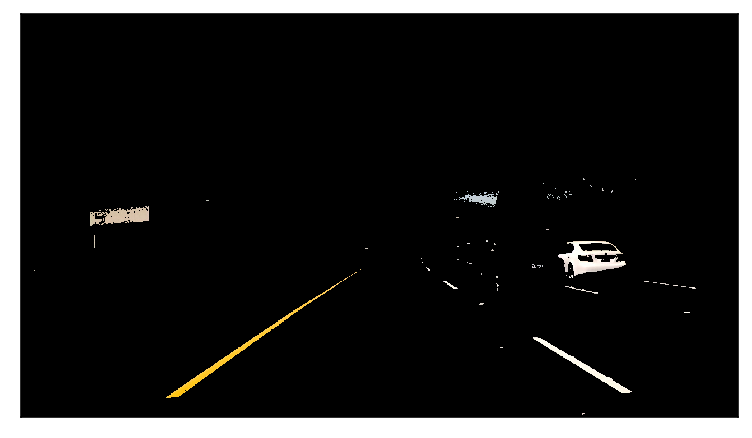

In [122]:
def select_rgb_white_yellow(image): 
  # white color mask
  lower = np.uint8([200, 200, 200])
  upper = np.uint8([255, 255, 255])
  white_mask = cv2.inRange(image, lower, upper)
  # yellow color mask
  lower = np.uint8([190, 190,   0])
  upper = np.uint8([255, 255, 255])
  yellow_mask = cv2.inRange(image, lower, upper)
  # combine the mask
  mask = cv2.bitwise_or(white_mask, yellow_mask)
  masked = cv2.bitwise_and(image, image, mask = mask)
  return masked

show_images(list(map(select_rgb_white_yellow, test_images)))

In [0]:
def convert_hsv(image):
  return cv2.cvtColor(image, cv2.COLOR_RGB2HSV)



In [0]:
def convert_hls(image):
  return cv2.cvtColor(image, cv2.COLOR_RGB2HLS)

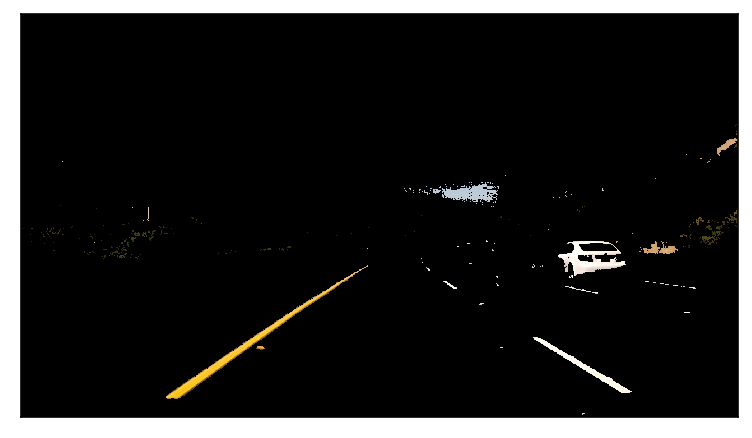

In [139]:
def select_white_yellow(image):
  converted = convert_hls(image)
  # white color mask
  lower = np.uint8([  0, 200,   0])
  upper = np.uint8([255, 255, 255])
  white_mask = cv2.inRange(converted, lower, upper)
  # yellow color mask
  # lower = np.uint8([ 10,   0, 100])
  # upper = np.uint8([ 40, 255, 255])
  lower = np.uint8([ 15, 30, 115])
  upper = np.uint8([ 30, 209, 255])
  yellow_mask = cv2.inRange(converted, lower, upper)
  # combine the mask
  mask = cv2.bitwise_or(white_mask, yellow_mask)
  return cv2.bitwise_and(image, image, mask = mask)

white_yellow_images = list(map(select_white_yellow, test_images))

show_images(white_yellow_images)

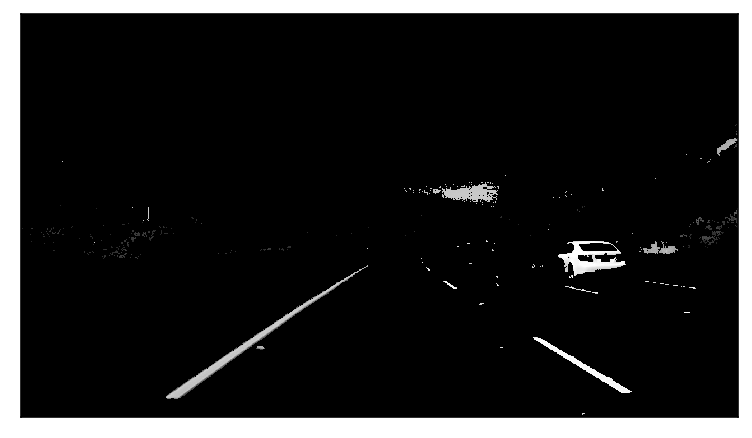

In [140]:
def convert_gray_scale(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

gray_images = list(map(convert_gray_scale, white_yellow_images))

show_images(gray_images)

In [0]:
def apply_smoothing(image, kernel_size=15):
    """
    kernel_size must be postivie and odd
    """
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

In [0]:
blurred_images = list(map(lambda image: apply_smoothing(image), gray_images))

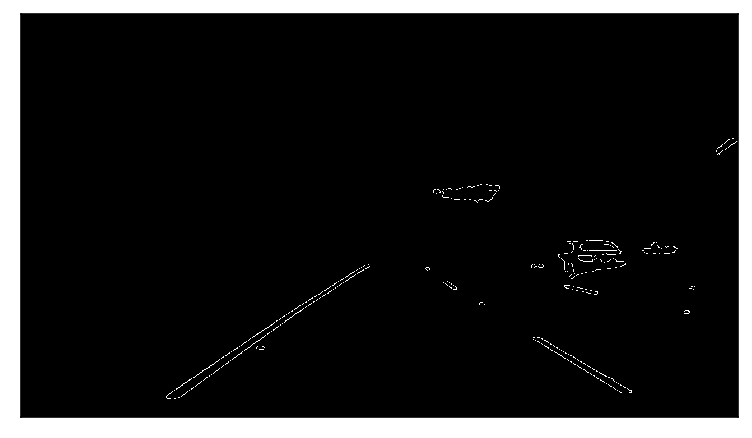

In [143]:
def detect_edges(image, low_threshold=50, high_threshold=150):
    return cv2.Canny(image, low_threshold, high_threshold)
    
edge_images = list(map(lambda image: detect_edges(image), blurred_images))

show_images(edge_images)

In [0]:
def filter_region(image, vertices):
    """
    Create the mask using the vertices and apply it to the input image
    """
    mask = np.zeros_like(image)
    if len(mask.shape)==2:
        cv2.fillPoly(mask, vertices, 255)
    else:
        cv2.fillPoly(mask, vertices, (255,)*mask.shape[2]) # in case, the input image has a channel dimension        
    return cv2.bitwise_and(image, mask)

In [0]:
def select_region(image):
    # """
    # It keeps the region surrounded by the `vertices` (i.e. polygon).  Other area is set to 0 (black).
    # """
    # first, define the polygon by vertices
  rows,cols    = image.shape[:2]
  bottom_left  = [cols*0.1, rows*0.95]
  top_left     = [cols*0.4, rows*0.6]
  bottom_right = [cols*0.9, rows*0.95]
  top_right    = [cols*0.6, rows*0.6] 
  # the vertices are an array of polygons (i.e array of arrays) and the data type must be integer
  vertices = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
  return filter_region(image, vertices)

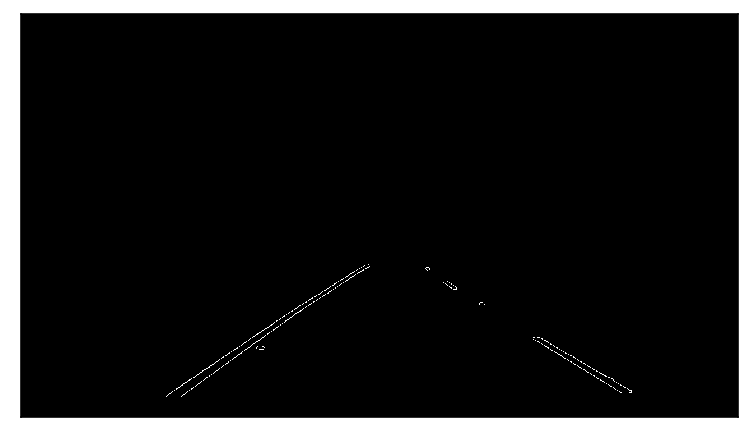

In [146]:
# images showing the region of interest only
roi_images = list(map(select_region, edge_images))

show_images(roi_images)

In [0]:
def hough_lines(image):
    """
    `image` should be the output of a Canny transform.
    
    Returns hough lines (not the image with lines)
    """
    return cv2.HoughLinesP(image, rho=1, theta=np.pi/180, threshold=20, minLineLength=20, maxLineGap=300)

In [0]:
list_of_lines = list(map(hough_lines, roi_images))

In [0]:
def draw_lines(image, lines, color=[255, 0, 0], thickness=2, make_copy=True):
    # the lines returned by cv2.HoughLinesP has the shape (-1, 1, 4)
    if make_copy:
        image = np.copy(image) # don't want to modify the original
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(image, (x1, y1), (x2, y2), color, thickness)
    return image


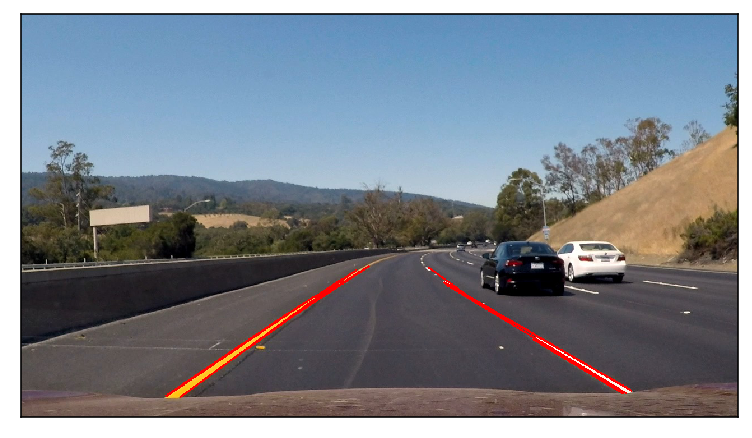

In [150]:
line_images = []
for image, lines in zip(test_images, list_of_lines):
    line_images.append(draw_lines(image, lines))
    
show_images(line_images)

In [151]:
jhk

NameError: ignored

In [0]:
def average_slope_intercept(lines):
    left_lines    = [] # (slope, intercept)
    left_weights  = [] # (length,)
    right_lines   = [] # (slope, intercept)
    right_weights = [] # (length,)
    
    # print(lines)
    for line in lines:
        for x1, y1, x2, y2 in line:
            if x2==x1:
                continue # ignore a vertical line
            slope = (y2-y1)/(x2-x1)
            intercept = y1 - slope*x1
            length = np.sqrt((y2-y1)**2+(x2-x1)**2)
            if slope < 0: # y is reversed in image
                left_lines.append((slope, intercept))
                left_weights.append((length))
            else:
                right_lines.append((slope, intercept))
                right_weights.append((length))
    # print(right_line)
    # print(left_lines)
    # add more weight to longer lines    
    left_lane  = np.dot(left_weights,  left_lines) /np.sum(left_weights)  if len(left_weights) >0 else None
    right_lane = np.dot(right_weights, right_lines)/np.sum(right_weights) if len(right_weights)>0 else None
    
    return left_lane, right_lane # (slope, intercept), (slope, intercept)

In [0]:
def make_line_points(y1, y2, line):
    """
    Convert a line represented in slope and intercept into pixel points
    """
    if line is None:
        return None
    
    slope, intercept = line
    
    # make sure everything is integer as cv2.line requires it
    x1 = int((y1 - intercept)/slope)
    x2 = int((y2 - intercept)/slope)
    y1 = int(y1)
    y2 = int(y2)
    
    return ((x1, y1), (x2, y2))

In [0]:
def lane_lines(image, lines):
  left_lane, right_lane = average_slope_intercept(lines)
  y1 = image.shape[0] # bottom of the image
  y2 = y1*0.6         # slightly lower than the middle
  left_line  = make_line_points(y1, y2, left_lane)
  right_line = make_line_points(y1, y2, right_lane)
  # print(right_line)
  # print(left_line)  
  return left_line, right_line

In [0]:
def draw_lane_lines(image, lines, color=[255, 0, 0], thickness=20):
    # make a separate image to draw lines and combine with the orignal later
    line_image = np.zeros_like(image)
    for line in lines:
        if line is not None:
            cv2.line(line_image, *line,  color, thickness)
    # image1 * α + image2 * β + λ
    # image1 and image2 must be the same shape.
    return cv2.addWeighted(image, 1.0, line_image, 0.95, 0.0)

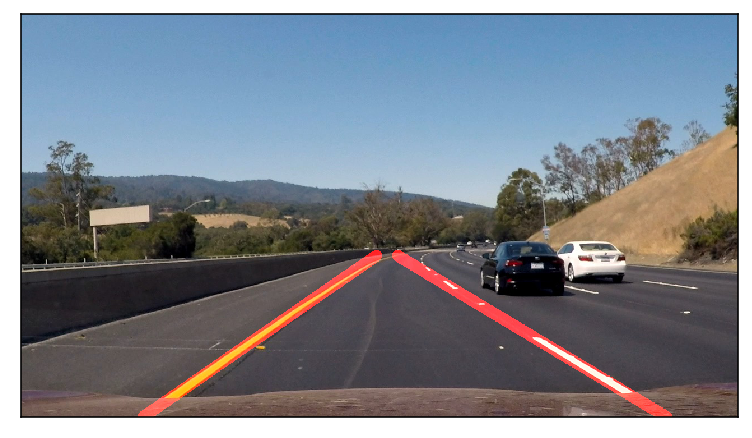

In [156]:
lane_images = []
for image, lines in zip(test_images, list_of_lines):
    lane_images.append(draw_lane_lines(image, lane_lines(image, lines)))

    
show_images(lane_images)

In [0]:
from collections import deque
QUEUE_LENGTH = 50

In [0]:
def process(image):
  white_yellow = select_white_yellow(image)
  gray         = convert_gray_scale(white_yellow)
  smooth_gray  = apply_smoothing(gray)
  edges        = detect_edges(smooth_gray)
  regions      = select_region(edges)
  lines        = hough_lines(regions)

  left_line, right_line = lane_lines(image, lines)

  Llines        = deque(maxlen=QUEUE_LENGTH)
  Rlines        = deque(maxlen=QUEUE_LENGTH)

  def mean_line(line, lines):
      if line is not None:
          lines.append(line)

      if len(lines)>0:
          line = np.mean(lines, axis=0, dtype=np.int32)
          line = tuple(map(tuple, line)) # make sure it's tuples not numpy array for cv2.line to work
      return line

  left_line  = mean_line(left_line,  Llines)
  right_line = mean_line(right_line, Rlines)

  # return draw_lines(image, lines)
  # return draw_lane_lines(image, lane_lines(image, lines))
  return draw_lane_lines(image, (left_line, right_line))

In [0]:
image = cv2.imread('/root/car-finding-lane-lines/test_images/YellowWhite.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

True

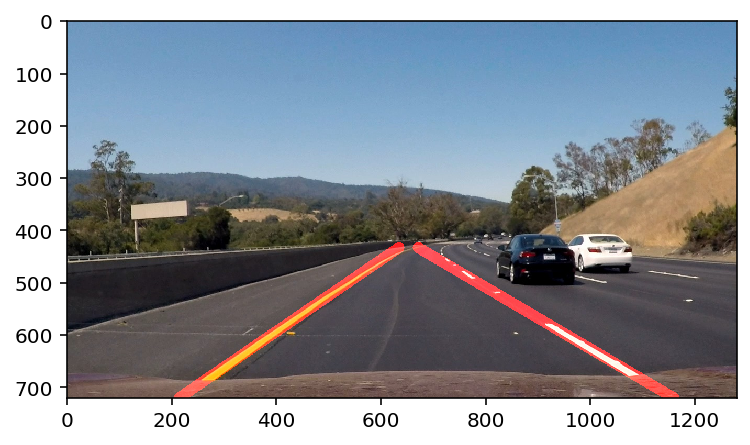

In [181]:
image_OP = process(image)
plt.imshow(image_OP,cmap = 'gray')
cv2.imwrite(os.path.join('/root', '/root/out.jpg'), image_OP)

In [161]:
sdfg

NameError: ignored

In [0]:
frames = []
frameResetCount = 0
frame_count = 0
batch_size = 2
capture = cv2.VideoCapture(os.path.join(VIDEO_FILE_DIR, 'solidYellowLeft.mp4'))      
while True:
# for y in range(10):
    ret, frame = capture.read()
    if not ret:
      print('broken')
      break        
    # Save each frame of the video to a list
    
    frameResetCount +=1
    frames.append(frame)
    # if len(frames) == batch_size:
    if frameResetCount == batch_size :
      frameResetCount = 0
      frame_count += 1
       
      results = model.detect(frames, verbose=0)
      for i, item in enumerate(zip(frames, results)):
        frame = item[0]
        r = item[1]
        print(frame_count)
        
        # show_images(select_white_yellow,frame)
        name = '{0}.jpg'.format(frame_count)
        name = os.path.join(VIDEO_IMAGE_DIR, name)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        processed_frame = process(frame)
        processed_frame = cv2.cvtColor(processed_frame, cv2.COLOR_RGB2BGR)
        display_results(processed_frame, r['rois'], r['masks'], r['class_ids'], 
                        class_names, r['scores'],show_mask=False,display_img=False,
                        save_img=True,show_warning = False, save_dir= VIDEO_IMAGE_DIR,img_name = name)
        # cv2.imwrite(os.path.join(VIDEO_IMAGE_DIR, name), processed_frame)
    frames = []

In [0]:
import glob
images = list(glob.iglob(os.path.join(VIDEO_IMAGE_DIR, '*.*')))
# Sort the images by name index.
images = sorted(images, key=lambda x: float(os.path.split(x)[1][:-3]))
images

In [0]:
def make_video(outvid, images=None, fps=15, size=None,
               is_color=True, format="FMP4"):
    """
    Create a video from a list of images.
 
    @param      outvid      output video
    @param      images      list of images to use in the video
    @param      fps         frame per second
    @param      size        size of each frame
    @param      is_color    color
    @param      format      see http://www.fourcc.org/codecs.php
    @return                 see http://opencv-python-tutroals.readthedocs.org/en/latest/py_tutorials/py_gui/py_video_display/py_video_display.html
    """
    from cv2 import VideoWriter, VideoWriter_fourcc, imread, resize
    fourcc = VideoWriter_fourcc(*format)
    vid = None
    for image in images:
        if not os.path.exists(image):
            raise FileNotFoundError(image)
        img = imread(image)
        if vid is None:
            if size is None:
                size = img.shape[1], img.shape[0]
            vid = VideoWriter(outvid, fourcc, float(fps), size, is_color)
        if size[0] != img.shape[1] and size[1] != img.shape[0]:
            img = resize(img, size)
        vid.write(img)
    vid.release()
    return vid

In [199]:
outvid = os.path.join('/root/out.mp4')
make_video(outvid, images=images, fps=15, size=None,
               is_color=True, format="FMP4")

<VideoWriter 0x7f7aeabbdcf0>